In [74]:
# Checking the installed version of polars and pandas
import polars as pl
from polars import col, lit, when
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

print(pl.__version__)
print(pd.__version__)

1.8.2
2.2.2


# Describing data distribution: Graphical Methods

## Learning objective

- The concept of data distribution
- Understanding the shape of a data distribution
- Getting familiar with constructing and drawing a histogram
- Being able to locate the center and spread of the distribution
- Identifying symmetric and asymmetric shapes

## Distributions to use

- Gaussian / Normal distribution
- Gamma
- Poisson
- Binomial


## Graphically displaying data

- bar plot of univariate categorical data
- comparative bar plot of categorical data
- histogram of univariate numerical data

### Displaying categorical data

- univariate categorical data
- bivariate categorical data

In [75]:
# Set random seed for reproducibility
np.random.seed(42)

# List of parties
list_party = ['Party 1', 'Party 2', 'Party 3', 'Party 4']

# Generate random data
data = {
    'ID': np.arange(1, 31),
    'Sex': np.random.choice(['Male', 'Female'], size=30),
    'Age': np.random.randint(18, 80, size=30),
    'Income (BDT)': np.random.randint(20000, 100000, size=30),
    'Political Affiliation': np.random.choice(list_party, size=30, p=[.4, .4, .15, .05])
}

df = pd.DataFrame(data)
df

,ID,Sex,Age,Income (BDT),Political Affiliation
0,1,Male,38,30627,Party 3
1,2,Female,50,28792,Party 2
2,3,Male,29,93969,Party 2
3,4,Male,75,63001,Party 2
4,5,Male,39,96552,Party 4
5,6,Female,78,43897,Party 2
6,7,Male,61,88148,Party 1
7,8,Male,42,43483,Party 1
8,9,Male,66,68555,Party 1
9,10,Female,44,37159,Party 1


### Bar plot

Create a new data/table to store the frequency distribution

In [27]:
df_agg_sex = df.groupby('Sex').agg(
    Count=('Sex', 'count')  
).reset_index()

df_agg_sex

,Sex,Count
0,Female,16
1,Male,14


<Axes: xlabel='Sex', ylabel='Count'>

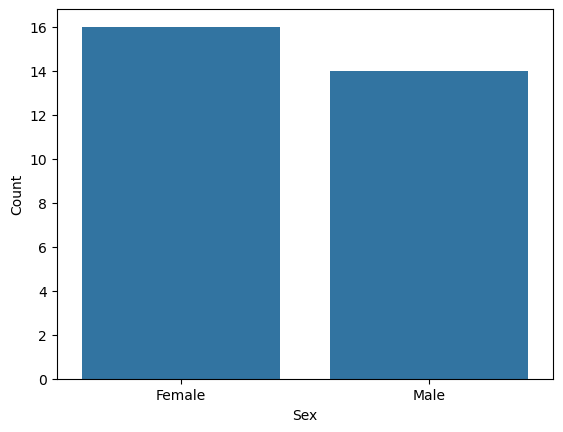

In [29]:
sns.barplot(df_agg_sex, x='Sex', y='Count')

<Axes: xlabel='Sex', ylabel='count'>

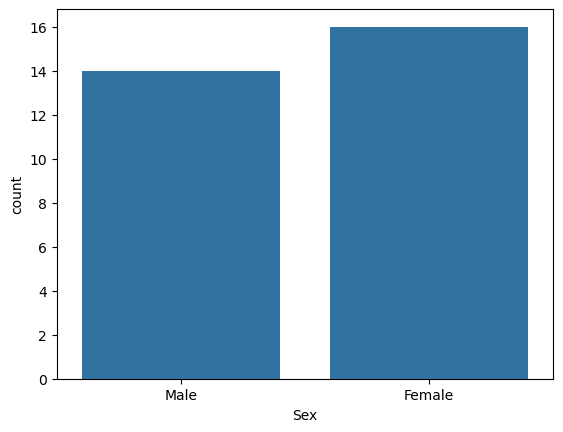

In [36]:
sns.countplot(df, x='Sex', stat='count')

<Axes: xlabel='Sex', ylabel='Count'>

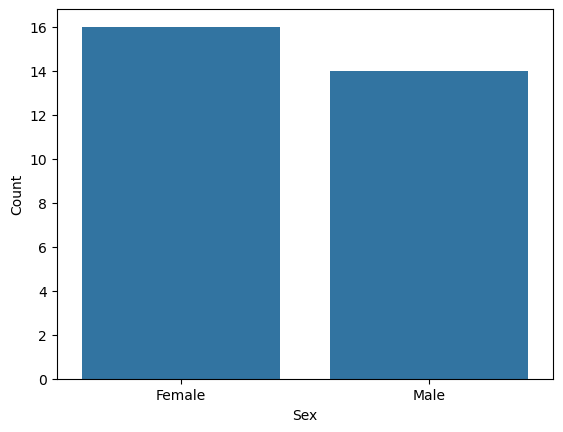

In [41]:
sns.barplot(df_agg_sex, x='Sex', y = 'Count', order=['Female', 'Male'])

In [51]:
df_agg_sex = df.groupby('Sex').agg(
    Count=('Sex', 'count')
).reset_index()

# Calculate the percentage
df_agg_sex['Percent'] = df_agg_sex['Count'] / df_agg_sex['Count'].sum() * 100
df_agg_sex


,Sex,Count,Percent
0,Female,16,53.333333
1,Male,14,46.666667


<Axes: xlabel='Sex', ylabel='Percent'>

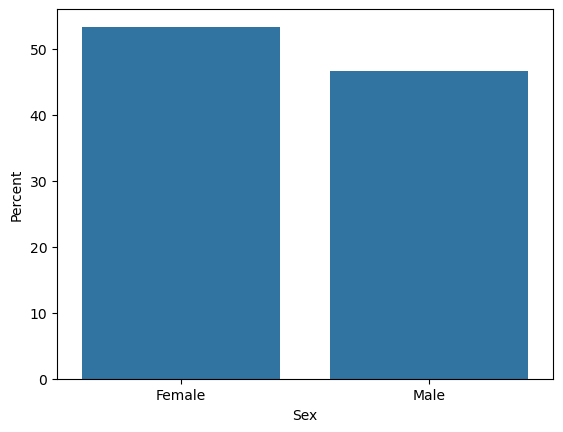

In [45]:
sns.barplot(df_agg_sex, x = 'Sex', y = 'Percent', order= ['Female', 'Male'])

### Comparative bar plots

We want to construct a bar plot grouped by sexes. First let us draw a barplot for political affiliations.

In [59]:
df_pol_aff = df.groupby('Political Affiliation').agg(
    Count=('Political Affiliation', 'count')
).reset_index()

df_pol_aff

,Political Affiliation,Count
0,Party 1,11
1,Party 2,14
2,Party 3,4
3,Party 4,1


<Axes: xlabel='Political Affiliation', ylabel='Count'>

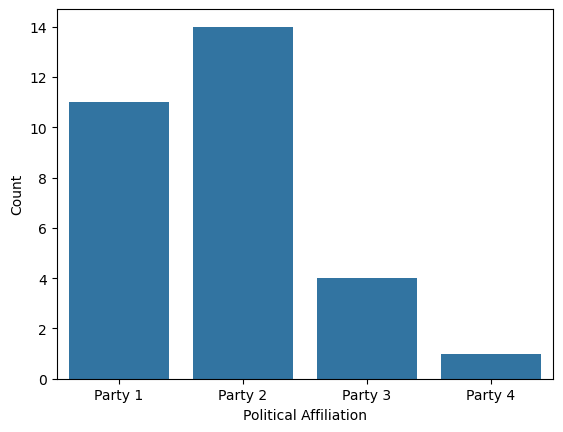

In [60]:
sns.barplot(df_pol_aff, x='Political Affiliation', y='Count', order=list_party)

<Axes: xlabel='Political Affiliation', ylabel='count'>

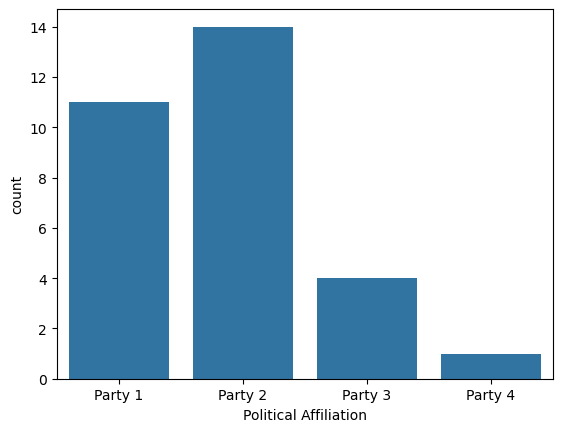

In [61]:
sns.countplot(df, x='Political Affiliation', stat='count', order=list_party)

### Plot the relative frequency of each party

<Axes: xlabel='Political Affiliation', ylabel='probability'>

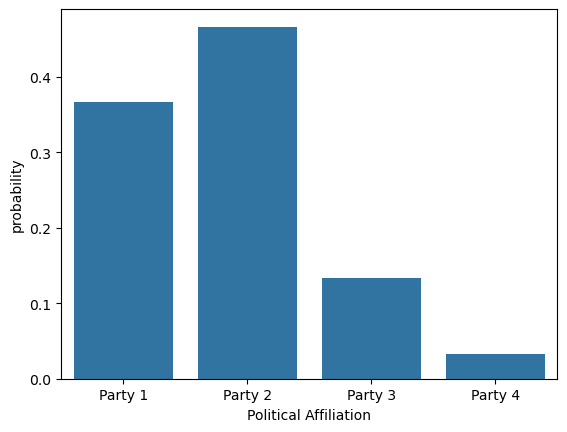

In [66]:
sns.countplot(df, x='Political Affiliation', stat='probability', order=list_party)

<Axes: xlabel='Political Affiliation', ylabel='proportion'>

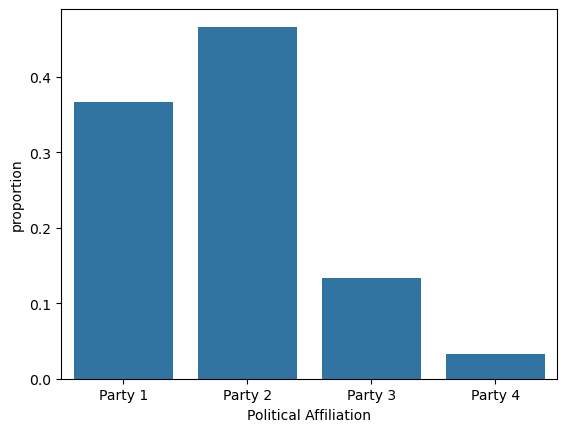

In [67]:
sns.countplot(df, x='Political Affiliation', stat='proportion', order=list_party)

<Axes: xlabel='Sex', ylabel='probability'>

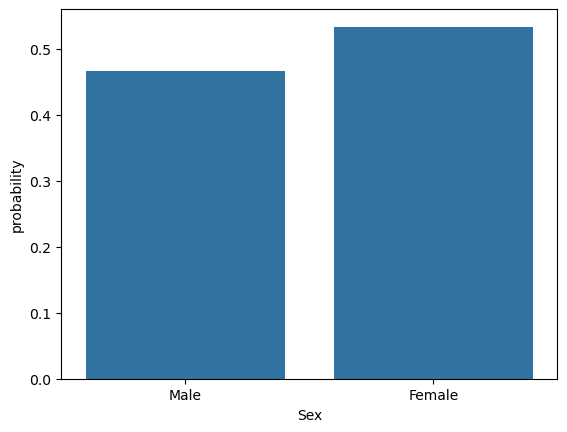

In [73]:
sns.countplot(df, x='Sex', stat='probability')

### Political affiliation compares between the sexes

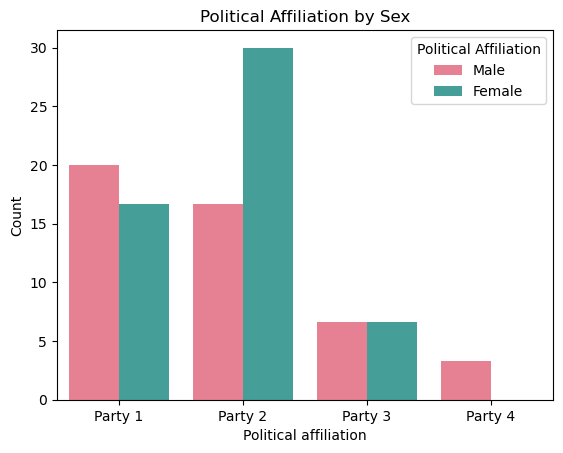

In [80]:
sns.countplot(data=df, x='Political Affiliation', hue='Sex', palette='husl', stat='percent', order=list_party)

# Set labels and title
plt.xlabel('Political affiliation')
plt.ylabel('Count')
plt.title('Political Affiliation by Sex')

# Show plot
plt.legend(title='Political Affiliation')
plt.show()

<Axes: xlabel='Sex', ylabel='percent'>

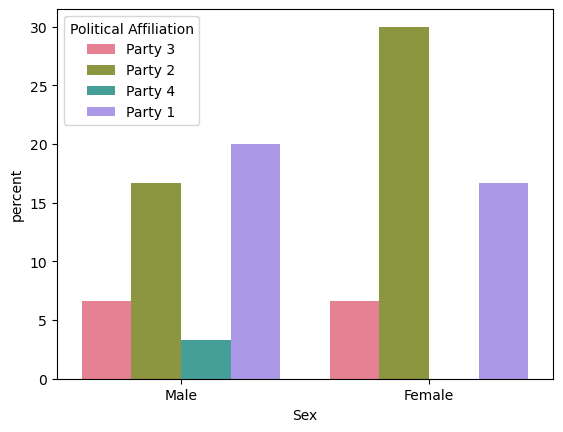

In [83]:
sns.countplot(data=df, x='Sex', hue='Political Affiliation', palette='husl', stat='percent')

## **Example: Tech layoff**